In [4]:
# Importing important libraries 

In [5]:
import numpy as np
import pandas as pd 


import matplotlib as mpl
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML



# Loading the BOSTON HOUSING DATASET

In [9]:
boston=load_boston()
#description of datasets 
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
#putting the data in panda dataframes
features=pd.DataFrame(boston.data ,columns=boston.feature_names)
features


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# Preprocessing 

In [11]:
standardscaler=preprocessing.StandardScaler()
features_scaled=standardscaler.fit_transform(features)
features_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [12]:
target=pd.DataFrame(boston.target,columns=['target'])
target


,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [13]:
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# visualization

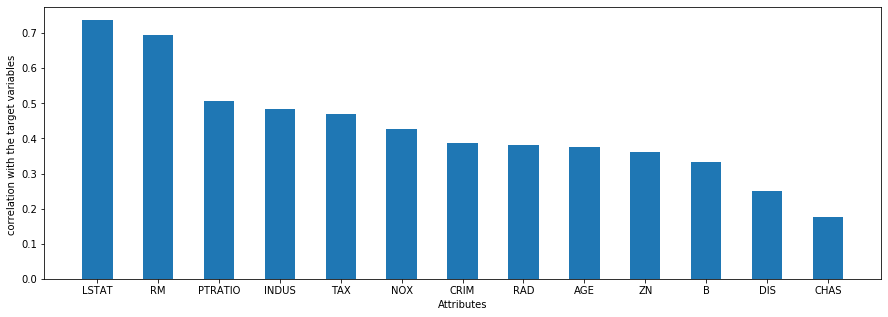

In [14]:
 corr=df.corr('pearson')
 corr=df.corr('pearson')
corrs=[abs(corr[attr]['target'])for attr in list(features)]
l=list(zip(corrs,list(features)))
l.sort(key=lambda x : x[0],reverse=True)
corrs,labels=list(zip((*l)))
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('correlation with the target variables ')
plt.xticks(index,labels)
plt.show()


# Splitting the data

In [15]:
X=df['LSTAT'].values
Y=df['target'].values

In [16]:
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [17]:
x_scaler=MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler=MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]


In [18]:
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
xtrain=xtrain.reshape(-1,1)
ytrain=ytrain.reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)

# Training the model

In [20]:
lm=LinearRegression()

In [21]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [22]:
lm.coef_

array([[-0.7761791]])

# Making predictions  

In [23]:
predictions=lm.predict(xtest)

Text(0, 0.5, 'Prediction')

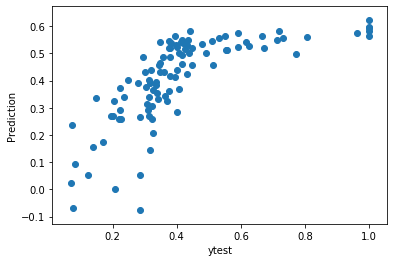

In [24]:
plt.scatter(ytest,predictions)
plt.xlabel('ytest')
plt.ylabel('Prediction')

In [25]:
from sklearn import metrics 
print('MSE:',metrics.mean_squared_error(ytest,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest,predictions)))

MSE: 0.021939584893340514
RMSE: 0.14812017044731118


In [26]:
p=pd.DataFrame(list(zip(xtest,ytest,predictions)),columns=['x','target_y','predictions'])
p

,x,target_y,predictions
0,[0.43791390728476826],[0.4022222222222223],[0.28291758594693567]
1,[0.13383002207505518],[0.6711111111111111],[0.518941141767969]
2,[0.10375275938189846],[0.6155555555555556],[0.5422864844036247]
3,[0.07753863134657837],[0.3955555555555556],[0.5626333426640586]
4,[0.29718543046357615],[0.28],[0.39214808818715985]
...,...,...,...
97,[0.0543598233995585],[1.0],[0.5806242489153897]
98,[0.26903973509933776],[0.39333333333333337],[0.41399418863520465]
99,[0.38576158940397354],[0.3711111111111111],[0.3233971250124305]
100,[0.7712472406181015],[0.06888888888888887],[0.024191219856365742]


# Plotting the predicted values against the target values

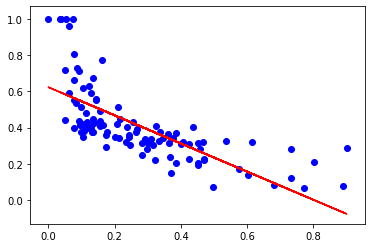

In [27]:
plt.scatter(xtest,ytest,color='b')
plt.plot(xtest,predictions,color='r')

# Reverting normalization to obtain predicted prices of house

In [28]:
predictions=np.array(predictions).reshape(-1,1)
xtest=xtest.reshape(-1,1)
ytest=ytest.reshape(-1,1)


xtest_scaled=x_scaler.inverse_transform(xtest)
ytest_scaled=y_scaler.inverse_transform(ytest)
predictions_scaled=y_scaler.inverse_transform(predictions)


xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predictions_scaled=predictions_scaled[:,-1]
p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predictions_scaled)),columns=['x','target_y','predictions'])
p=p.round(decimals=2)
p.head()

,x,target_y,predictions
0,17.60,23.1,17.73
1,6.58,35.2,28.35
2,5.49,32.7,29.40
3,4.54,22.8,30.32
4,12.50,17.6,22.65
